## Import des bibliothèques 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer


### Chargement des dataframe pour le projet

In [35]:
x_train = pd.read_csv(r"./data/x_train.csv")
y_train = pd.read_csv(r"./data/y_train.csv")
x_test = pd.read_csv(r"./data/x_test.csv")

In [36]:
x_train = x_train.set_index('ID')
y_train = y_train.set_index('ID')
x_test = x_test.set_index('ID')

In [37]:
train = pd.concat([x_train, y_train], axis=1)
data = pd.concat([train, x_test], axis=0)

,question,intention
ID,,
0,"bonjour, je m suis trompé de forum pour ma qu...",28
1,est ce que le motilium me soulagera contre les...,31
2,mon médecin m'a prescrit adenyl. au 2ème cache...,28
3,Est-ce qu'il existe une forme adaptée aux enfa...,44
4,mon medecin me soigne pour une rhino pha...,31
...,...,...
8023,en combien de temps un antibio n'est plus prés...,41
8024,j'ai fait vacciner de revaxis mon fils 'année ...,48
8025,Un patient m’a ramené une ordonnance de 3x1g d...,42


### Début de l'analyse des dataframes

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(8028, 2)
(8028, 2)
(2035, 2)


In [11]:
test["intention"].max()

50

In [41]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Télécharger les ressources NLTK nécessaires
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    # Convertir le texte en minuscules
    text = text.lower()
    
    # Supprimer les balises HTML (le cas échéant)
    text = re.sub(r'<.*?>', '', text)
    
    # Supprimer la ponctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenization (division en mots)
    tokens = nltk.word_tokenize(text)
    
    # Supprimer les mots vides
    stop_words = set(stopwords.words('french'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Rejoindre les mots traités en une seule chaîne de caractères
    processed_text = ' '.join(tokens)
    
    return processed_text

# Exemple d'utilisation
data.question = data.question.apply(preprocess_text)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/neilmarteau/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/neilmarteau/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/neilmarteau/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

X = test["question"]
y = test["intention"]
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer la matrice TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # ajustez le nombre de fonctionnalités si nécessaire
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialiser et entraîner le classificateur Naive Bayes
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)

# Prédire les intentions pour les données de test
y_pred = clf.predict(X_test_tfidf)

# Évaluer les performances du modèle
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.24      0.39        41
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        13
           5       1.00      0.05      0.09        22
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         2
           8       0.92      0.41      0.56        27
           9       0.00      0.00      0.00         9
          10       0.00      0.00      0.00        16
          11       0.00      0.00      0.00        35
          12       0.00      0.00      0.00         8
          13       0.67      0.12      0.20        17
          14       0.50      0.41      0.45        56
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00         4
          17       0.00    

/Users/neilmarteau/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/neilmarteau/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/neilmarteau/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Define a list of classifiers to try
classifiers = {
    "Multinomial Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

# Iterate over classifiers and evaluate them using cross-validation
for clf_name, clf in classifiers.items():
    # Fit the classifier using Bag of Words representation
    clf.fit(X_train_tfidf, y_train)
    
    # Evaluate the classifier using cross-validation
    scores = cross_val_score(clf, X_train_tfidf, y_train, cv=5)
    
    # Print the mean accuracy and standard deviation
    print(f"{clf_name}:")
    print(f"  Mean Accuracy: {scores.mean():.2f}")
    print(f"  Standard Deviation: {scores.std():.2f}")

Multinomial Naive Bayes:
  Mean Accuracy: 0.44
  Standard Deviation: 0.00
Logistic Regression:
  Mean Accuracy: 0.55
  Standard Deviation: 0.01
Random Forest:
  Mean Accuracy: 0.57
  Standard Deviation: 0.01
Support Vector Machine:
  Mean Accuracy: 0.55
  Standard Deviation: 0.01


In [ ]:
list(x_train.index)

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

# Créer une instance de CountVectorizer
count_vectorizer = CountVectorizer()

# Adapter le count vectorizer aux données d'entraînement et le transformer en une représentation de sac de mots
X_train_bw = count_vectorizer.fit_transform(X_train)
X_test_bw = count_vectorizer.transform(X_test)

In [26]:
# Define a list of classifiers to try
classifiers = {
    "Multinomial Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

# Iterate over classifiers and evaluate them using cross-validation
for clf_name, clf in classifiers.items():
    # Fit the classifier using Bag of Words representation
    clf.fit(X_train_bw, y_train)
    
    # Evaluate the classifier using cross-validation
    scores = cross_val_score(clf, X_train_bw, y_train, cv=5)
    
    # Print the mean accuracy and standard deviation
    print(f"{clf_name}:")
    print(f"  Mean Accuracy: {scores.mean():.2f}")
    print(f"  Standard Deviation: {scores.std():.2f}")

Multinomial Naive Bayes:
  Mean Accuracy: 0.47
  Standard Deviation: 0.01
Logistic Regression:
  Mean Accuracy: 0.61
  Standard Deviation: 0.02
Random Forest:
  Mean Accuracy: 0.59
  Standard Deviation: 0.00
Support Vector Machine:
  Mean Accuracy: 0.49
  Standard Deviation: 0.01


In [32]:
# Initialiser et entraîner le classificateur Naive Bayes
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_bw, y_train)

# Prédire les intentions pour les données de test
y_pred = clf.predict(x_test_bw)

ValueError: X has 4740 features, but LogisticRegression is expecting 9506 features as input.

In [31]:
x_test

,ID,question
0,8028,autismehoméopathieantidote vaccins
1,8029,quel topique appliquer dermatite atopique nour...
2,8030,traitement kystes diane 35
3,8031,souffre dinsuffisance veineuse acrocyanose jai...
4,8032,enceinte depuis 1 mois huiles essentielles con...
...,...,...
2030,10058,pivalone uttilisable chez femme enceinte
2031,10059,sou traitement depakote 750 depuis plus dun an...
2032,10060,cest normal davoir règles peu abondnantes util...
2033,10061,jai vacciné lhépatite b 2 injection quand java...


In [29]:
x_test["question"] = x_test.question.apply(preprocess_text)
x_test_bw = count_vectorizer.fit_transform(x_test["question"])

In [6]:
x_train = x_train.set_index('ID')
y_train = y_train.set_index('ID')

test = pd.concat([x_train, y_train], axis=1)
test 

,question,intention
ID,,
0,"bonjour, je m suis trompé de forum pour ma qu...",28
1,est ce que le motilium me soulagera contre les...,31
2,mon médecin m'a prescrit adenyl. au 2ème cache...,28
3,Est-ce qu'il existe une forme adaptée aux enfa...,44
4,mon medecin me soigne pour une rhino pha...,31
...,...,...
8023,en combien de temps un antibio n'est plus prés...,41
8024,j'ai fait vacciner de revaxis mon fils 'année ...,48
8025,Un patient m’a ramené une ordonnance de 3x1g d...,42


In [6]:
x_train.head()

,ID,question
0,0,"bonjour, je m suis trompé de forum pour ma qu..."
1,1,est ce que le motilium me soulagera contre les...
2,2,mon médecin m'a prescrit adenyl. au 2ème cache...
3,3,Est-ce qu'il existe une forme adaptée aux enfa...
4,4,mon medecin me soigne pour une rhino pha...


In [5]:
y_train.head()

,ID,intention
0,0,28
1,1,31
2,2,28
3,3,44
4,4,31


In [4]:
x_test.head()

,ID,question
0,8028,autisme-homéopathie-antidote vaccins ??
1,8029,Quel topique appliquer pour dermatite atopique...
2,8030,traitement kystes avec diane 35?
3,8031,je souffre d'insuffisance veineuse (acrocyanos...
4,8032,"je suis enceinte depuis 1 mois, est ce que les..."


#### vérification de la présence de doublons

#### Affichage d'un histogrammme pour voir le noombre d'occurence de chaque intention
##### on peut s'apercevoir que l'intention 28 revient très souvent et pourrait biaisé le modèle

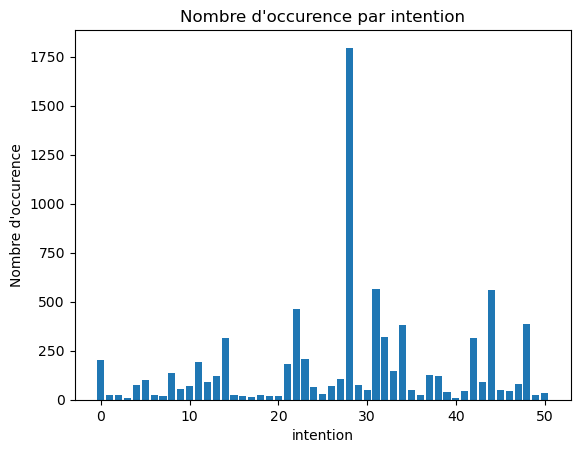

In [12]:
plt.bar(y_train["intention"].value_counts().index, y_train["intention"].value_counts())
plt.xlabel("intention")
plt.ylabel("Nombre d'occurence")
plt.title("Nombre d'occurence par intention")
plt.show()

##### Merging des dataframe x_train et y_train car nous en avons besoin pour l'entrainement du modèle de classification NLP

In [13]:
import string
def remove_punct(text):
    r = ""
    for i in text:
        if i not in string.punctuation:
            r+=i
        else:
            r+=" "
    return r

def add_text_list(text):
    return text.split()

def remove_one_character(liste):
    liste1 = []
    for i in liste:
        if len(i) > 1:
            liste1.append(i)
    return " ".join(liste1)

In [14]:
data = pd.merge(x_train, y_train, on = "ID", how = "inner")

In [16]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

# Download NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load stopwords and initialize stemmer and lemmatizer
stop_words = set(stopwords.words('french'))  # Assuming you're working with English text
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()



# Preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    # Lowercasing
    tokens = [word.lower() for word in tokens]
    # Removing punctuation and stop words
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    # Stemming
    # stemmed_tokens = [stemmer.stem(word) for word in tokens]
    # Lemmatization
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Joining tokens back into a single string
    preprocessed_text = ' '.join(lemmatized_tokens)
    return preprocessed_text

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/neilmarteau/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/neilmarteau/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/neilmarteau/nltk_data...


In [18]:
# Apply preprocessing function to 'question' column
data['question_preprocessed'] = data['question'].apply(preprocess_text)

# Example output
print(data[['question', 'question_preprocessed']])

                                               question  \
0     bonjour,  je m suis trompé de forum pour ma qu...   
1     est ce que le motilium me soulagera contre les...   
2     mon médecin m'a prescrit adenyl. au 2ème cache...   
3     Est-ce qu'il existe une forme adaptée aux enfa...   
4     mon  medecin  me soigne  pour  une  rhino  pha...   
...                                                 ...   
8023  en combien de temps un antibio n'est plus prés...   
8024  j'ai fait vacciner de revaxis mon fils 'année ...   
8025  Un patient m’a ramené une ordonnance de 3x1g d...   
8026  prise pillule du lendemain, faire une pause en...   
8027                                  advil médicament?   

                                  question_preprocessed  
0     bonjour trompé forum question alors repose ici...  
1                     motilium soulagera contre nausées  
2     médecin a prescrit adenyl cachet maux tête ter...  
3               existe forme adaptée enfant micropakine  
4

In [23]:
data[["question_preprocessed", "intention"]]

,question_preprocessed,intention
0,bonjour trompé forum question alors repose ici...,28
1,motilium soulagera contre nausées,31
2,médecin a prescrit adenyl cachet maux tête ter...,28
3,existe forme adaptée enfant micropakine,44
4,medecin soigne rhino pharingite a prescrit amo...,31
...,...,...
8023,combien temp antibio plus présent corp,41
8024,fait vacciner revaxis fils dernière alors mois...,48
8025,patient a ramené ordonnance pendant otite moye...,42
8026,prise pillule lendemain faire pause ensuite,14


In [15]:
data["question_modifier"] = data["question"].apply(remove_punct)
data["question_modifier_1"] = data["question_modifier"].apply(add_text_list)
data["question_modifier_2"] = data["question_modifier_1"].apply(remove_one_character)

In [24]:
import pandas as pd
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# Assuming you have your preprocessed DataFrame named 'data' with columns 'question_preprocessed' and 'intention'

# Tokenize the preprocessed text
data['tokens'] = data['question_preprocessed'].apply(word_tokenize)

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=data['tokens'], vector_size=100, window=5, min_count=1, workers=4)

# Save or use the trained Word2Vec model
# word2vec_model.save("word2vec_model.bin")

# Get word embeddings for each question
def get_embeddings(tokens):
    embeddings = []
    for token in tokens:
        if token in word2vec_model.wv:
            embeddings.append(word2vec_model.wv[token])
    if embeddings:
        return sum(embeddings) / len(embeddings)  # Average word embeddings for the question
    else:
        return [0] * 100  # Return zero vector if no embeddings found

data['word_embeddings'] = data['tokens'].apply(get_embeddings)

# Example output
print(data[['question_preprocessed', 'word_embeddings', 'intention']])


                                  question_preprocessed  \
0     bonjour trompé forum question alors repose ici...   
1                     motilium soulagera contre nausées   
2     médecin a prescrit adenyl cachet maux tête ter...   
3               existe forme adaptée enfant micropakine   
4     medecin soigne rhino pharingite a prescrit amo...   
...                                                 ...   
8023             combien temp antibio plus présent corp   
8024  fait vacciner revaxis fils dernière alors mois...   
8025  patient a ramené ordonnance pendant otite moye...   
8026        prise pillule lendemain faire pause ensuite   
8027                                   advil médicament   

                                        word_embeddings  intention  
0     [-0.14724894, 0.28584772, 0.011314727, 0.06157...         28  
1     [-0.12514384, 0.22466981, 0.019425359, 0.05682...         31  
2     [-0.118017055, 0.22552599, 0.0128001645, 0.051...         28  
3     [-0.08878

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Assuming you have your DataFrame named 'data' with 'word_embeddings' and 'intention' columns

# Extract features (word embeddings) and target variable
X = data['word_embeddings'].to_list()
y = data['intention']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Classifier Accuracy:", accuracy)


Random Forest Classifier Accuracy: 0.38854296388542964


In [27]:

# Initialize CountVectorizer
count_vectorizer = CountVectorizer()

# Fit the CountVectorizer on the preprocessed text
X_bag_of_words = count_vectorizer.fit_transform(data['question_preprocessed'])

# Convert the sparse matrix to a DataFrame
df_bag_of_words = pd.DataFrame(X_bag_of_words.toarray(), columns=count_vectorizer.get_feature_names_out())

# Concatenate the bag of words DataFrame with the 'intention' column
df_bag_of_words_with_labels = pd.concat([df_bag_of_words, data['intention']], axis=1)

# Display the bag of words DataFrame
print(df_bag_of_words_with_labels)

      aa  abandonné  abcés  abdo  abdominal  abdominale  abdominales  abies  \
0      0          0      0     0          0           0            0      0   
1      0          0      0     0          0           0            0      0   
2      0          0      0     0          0           0            0      0   
3      0          0      0     0          0           0            0      0   
4      0          0      0     0          0           0            0      0   
...   ..        ...    ...   ...        ...         ...          ...    ...   
8023   0          0      0     0          0           0            0      0   
8024   0          0      0     0          0           0            0      0   
8025   0          0      0     0          0           0            0      0   
8026   0          0      0     0          0           0            0      0   
8027   0          0      0     0          0           0            0      0   

      abigail  abilfy  ...  évidence  évident  évit

In [28]:
# Split the data into features (bag of words) and target variable
X = df_bag_of_words_with_labels.drop(columns=['intention'])
y = df_bag_of_words_with_labels['intention']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Classifier Accuracy:", accuracy)

ValueError: multiclass-multioutput is not supported

In [42]:
x_test["question_modifier"] = x_test["question"].apply(remove_punct)
x_test["question_modifier_1"] = x_test["question_modifier"].apply(add_text_list)
x_test["question_modifier_2"] = x_test["question_modifier_1"].apply(remove_one_character)
x_test["question_modifier_2"] = x_test["question_modifier_2"].apply(remove_stopwords)

x_test_counts = count_vect.transform(x_test['question_modifier_2'].tolist())
x_test_tfidf = tfidf_transformer.transform(x_test_counts)

# Predict labels for x_test
#y_test_score = clf.predict(x_test_tfidf)
y_test_score = rf_clf.predict(x_test_tfidf)

# Now you have the predicted labels for x_test, you can do whatever you want with them
# For example, you can add the predicted labels to x_test DataFrame
x_test['predicted_intention'] = [list(top_10_varieties.keys())[i] for i in y_test_score]



In [43]:
output_test = x_test[["ID", "predicted_intention"]]

In [44]:
output_test

,ID,predicted_intention
0,8028,22
1,8029,32
2,8030,32
3,8031,22
4,8032,44
...,...,...
2030,10058,44
2031,10059,28
2032,10060,28
2033,10061,14


In [29]:
output_test.to_csv("submission.csv", index=False)